In [1]:
from tl_simplification.ltlf.LTLf import LTLf
import spot
from tl_simplification.ltlf.spot_utils import *
from tl_simplification.inference.int_set import IntegerSet
from tl_simplification.inference.predicate import PredicateChecker

### Simplify LTLf Formula

In [9]:
exp = LTLf.always(LTLf.implies(
    LTLf.pred("A", []),
    LTLf.next(LTLf._or(
        LTLf.pred("B", []),
        LTLf.pred("C", [])
    ))
    ))
print(exp)

G((A -> X((B | C))))


In [10]:
# Define Predicate Checker. 
# In our case we know that A is true in [0,10] and that B is true in [5,15]. We have no information about C

class TestChecker(PredicateChecker):

    def __init__(self):
        super().__init__()
        self.add_predicate("A", TestChecker.interval_v1, 0)
        self.add_predicate("B", TestChecker.interval_v2, 0)

    def interval_v1(input) -> Tuple[IntegerSet, IntegerSet]:
        
        I_true = IntegerSet.from_interval([0,10])
        I_false = IntegerSet.empty()

        return I_true, I_false

    def interval_v2(input) -> Tuple[IntegerSet, IntegerSet]:
        I_true = IntegerSet.from_interval([5,15])
        I_false = IntegerSet.empty()
        return I_true, I_false

In [14]:
# simplify LTLf formula
I = IntegerSet([0], False)
pc = TestChecker()

simp_exp = LTLf.interval_simplification(exp, I, pc).get_at_timestep(0)

print(simp_exp)

G[0,3](X((B | C))) & G[15,inf]((!(A) | X((B | C))))


### Büchi Automata

Büchi Automata of original formula


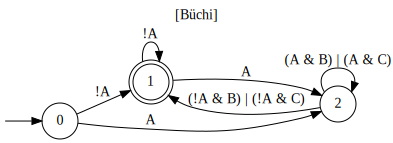

In [12]:
print("Büchi Automata of original formula")
to_buechi(exp)

Büchi Automata of simplified formula


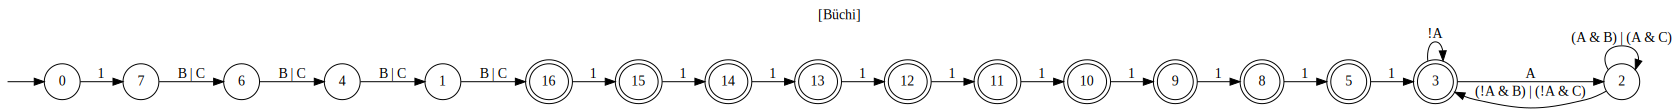

In [15]:
print("Büchi Automata of simplified formula")
to_buechi(simp_exp)